$\text{Multiple Qubits Quantum Gates}$

In [171]:
#Importing

import qiskit
import numpy as np
import math
from qiskit import QuantumCircuit,QuantumRegister,transpile
from qiskit.quantum_info import DensityMatrix, Operator
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere
from qiskit.quantum_info import Statevector
from  math import pi, sqrt

mpl = 'mpl'


$\text{Quantum CNOT Gate}$

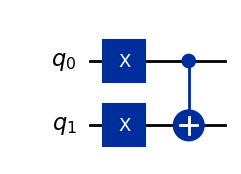

In [172]:
#CX gate on |11> = |10> (|01> according to qiskit ordering)

qc_cx = QuantumCircuit(2, name='qc')
qc_cx.x(0) # X gate on the first qubit
qc_cx.x(1) # X gate on the second qubit
qc_cx.cx(0,1) # CX gate with the first bit as control and the second bit as target 
qc_cx.draw('mpl')

$\text{density matrix plot for CNOT gate}$

the quantum state is:  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


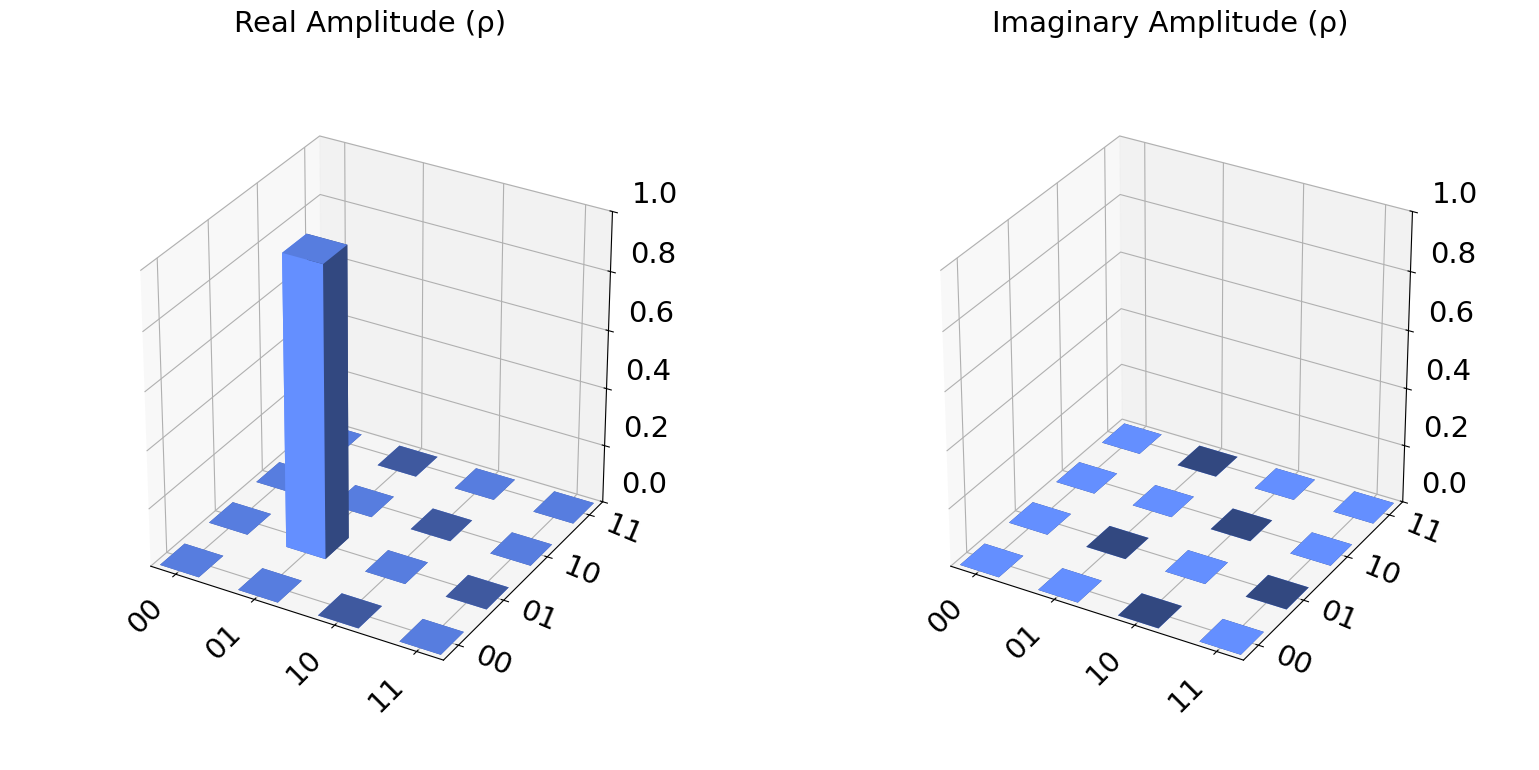

In [173]:
simulator_gate = Aer.get_backend('statevector_simulator')

#execute the circuit
job_state = simulator_gate.run(qc_cx)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(qc_cx)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)


$\text{Qsphere plot for the CX gate}$

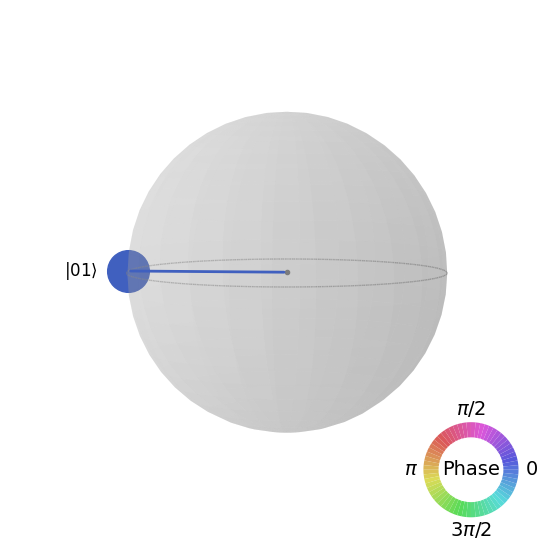

In [174]:
#plot the qsphee

psi = result.get_statevector(qc_cx)
plot_state_qsphere(psi)

$\text{Unitary Matrix for the CX gate}$

In [175]:
#unitary

backend = Aer.get_backend('unitary_simulator')

cx_unitary = backend.run(qc_cx).result().get_unitary(qc_cx, decimals=3)

print("Circuit unitary:\n", np.asarray(cx_unitary).round(5))

Circuit unitary:
 [[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


$\text{Running CNOT gate using QASM simulator}$

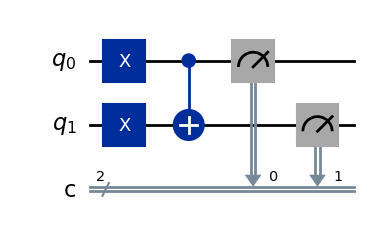

In [176]:
#CNOT with measurement 

qc_cx = QuantumCircuit(2,2,name='qc')
qc_cx.x(1)
qc_cx.x(0)
qc_cx.cx(0,1)

qc_cx.measure([0,1], [0,1])

qc_cx.draw('mpl')


the total counts are:  {'01': 1000}


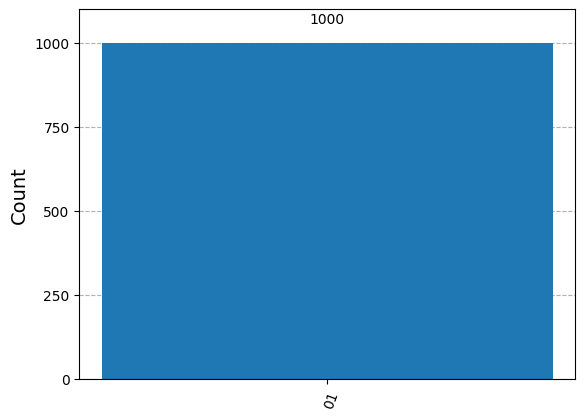

In [177]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc_cx, shots=1000)
result = job.result()

counts = result.get_counts(qc_cx)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CNOT gate using CZ gate and H gate}$

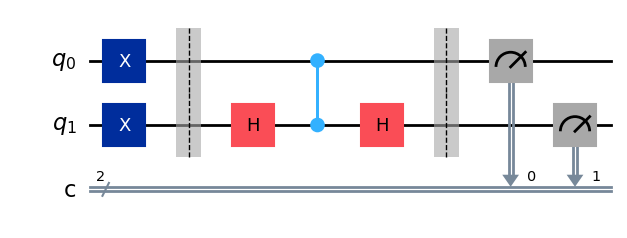

In [178]:
#CNOT with measurement

qc_cx = QuantumCircuit(2,2,name='qc')
qc_cx.x(0)
qc_cx.x(1)
qc_cx.barrier()
qc_cx.h(1)
qc_cx.cz(0,1) #CZ gate
qc_cx.h(1) # H gate on the second qubit
qc_cx.barrier()
qc_cx.measure([0,1], [0,1])
qc_cx.draw('mpl')

$\text{QASM}$

the total counts are:  {'01': 1000}


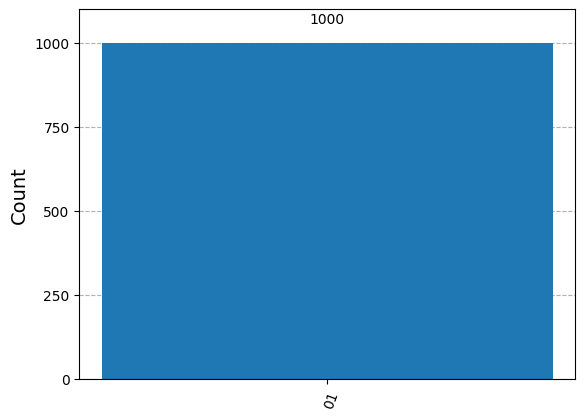

In [179]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc_cx, shots=1000)
result = job.result()

counts = result.get_counts(qc_cx)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CZ gate}$

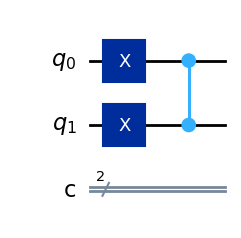

In [180]:
qc_cz = QuantumCircuit(2,2,name='qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1) #CZ gate with the first bit is the control and the second bit is the target
qc_cz.draw(mpl)

$\text{density matrix for CZ gate}$

the quantum state is:  Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))


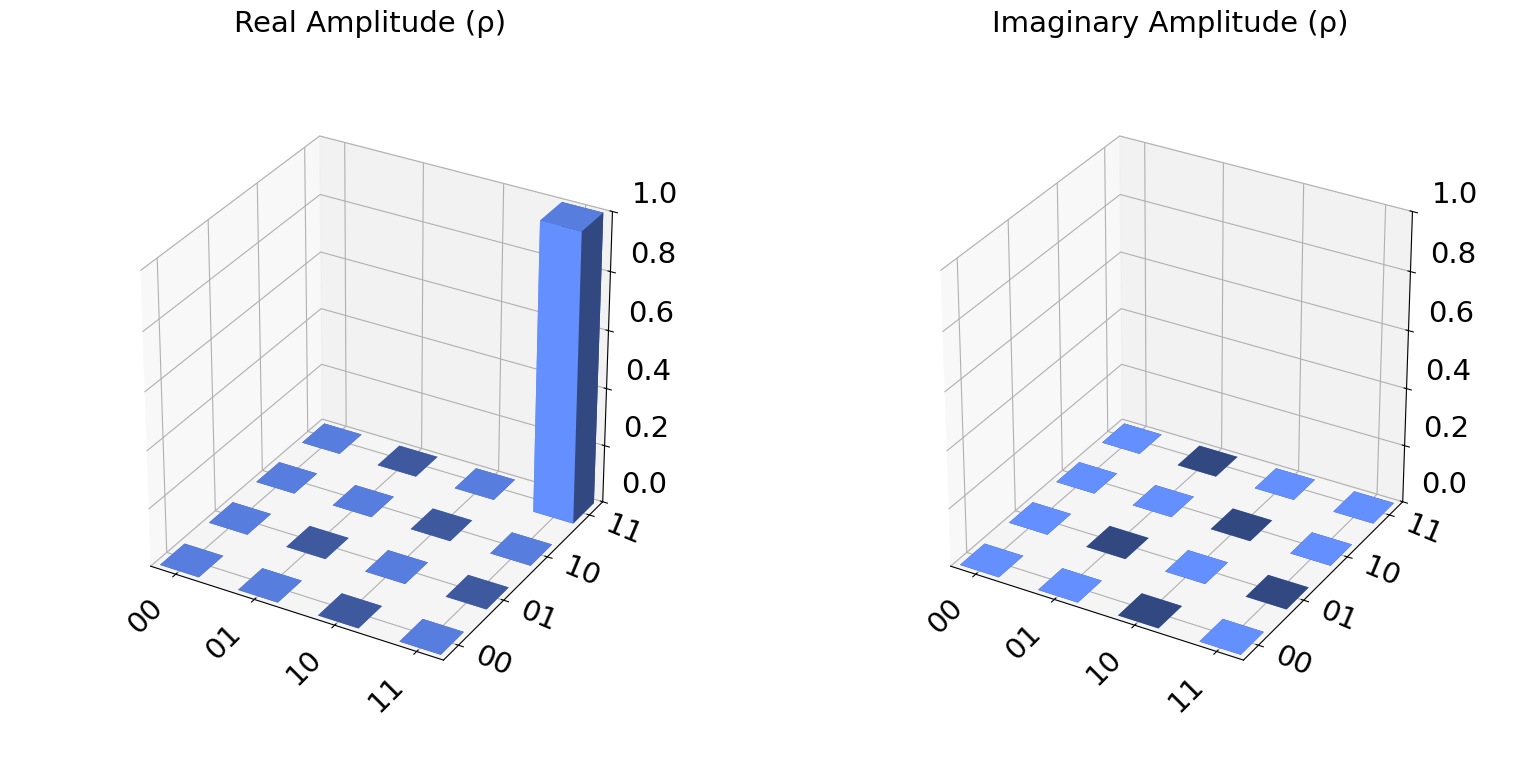

In [181]:
simulator_gate = Aer.get_backend('statevector_simulator')

#execute the circuit
job_state = simulator_gate.run(qc_cz)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(qc_cz)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)

$\text{qsphere for the CZ gate}$

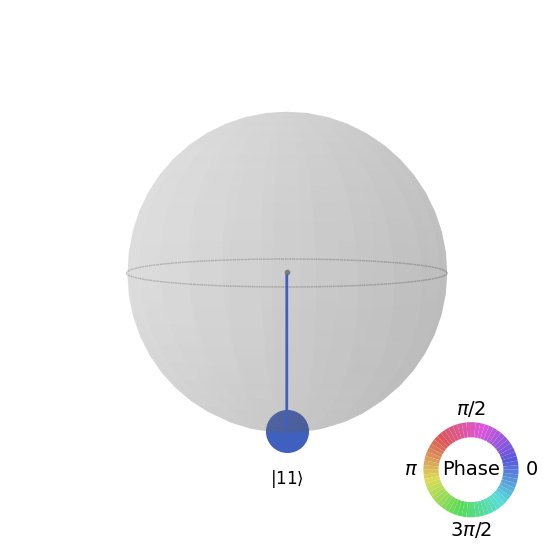

In [182]:
#plot the qsphee

psi = result.get_statevector(qc_cz)
plot_state_qsphere(psi)

$\text{Unitary Matrix for the CZ gate}$

In [183]:
#unitary

backend = Aer.get_backend('unitary_simulator')

cz_unitary = backend.run(qc_cz).result().get_unitary(qc_cz, decimals=3)

print("Circuit unitary:\n", np.asarray(cz_unitary).round(5))

Circuit unitary:
 [[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j -0.+0.j -0.+0.j -0.+0.j]]


$\text{CZ using QASM simulator}$

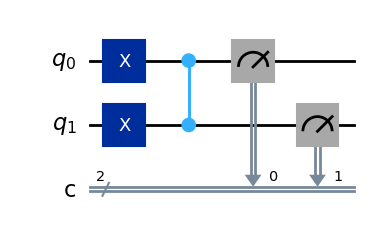

In [184]:
qc_cz = QuantumCircuit(2,2,name='qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1) #CZ gate with the first bit is the control and the second bit is the target
qc_cz.measure([0,1], [0,1])
qc_cz.draw(mpl)

the total counts are:  {'11': 1000}


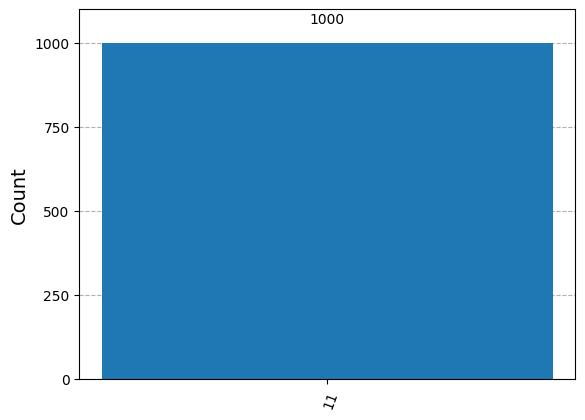

In [185]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc_cz, shots=1000)
result = job.result()

counts = result.get_counts(qc_cz)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CZ gate using CNOT and H gate}$

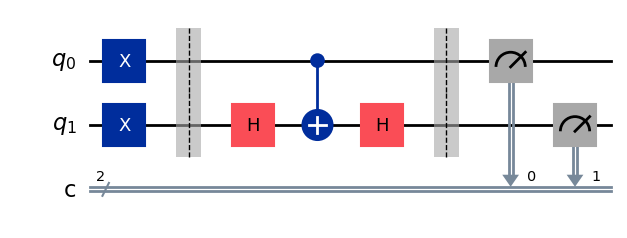

In [186]:
qc_cz = QuantumCircuit(2,2,name='qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.barrier()
qc_cz.h(1)
qc_cz.cx(0,1)
qc_cz.h(1)
qc_cz.barrier()
qc_cz.measure([0,1], [0,1])
qc_cz.draw(mpl)

$\text{Quantum CH gate}$

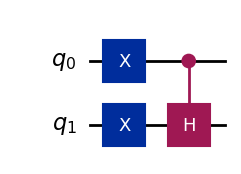

In [187]:
#CH gate on |11>
qc_ch = QuantumCircuit(2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)

qc_ch.draw(mpl)

$\text{density plot for CH gate}$

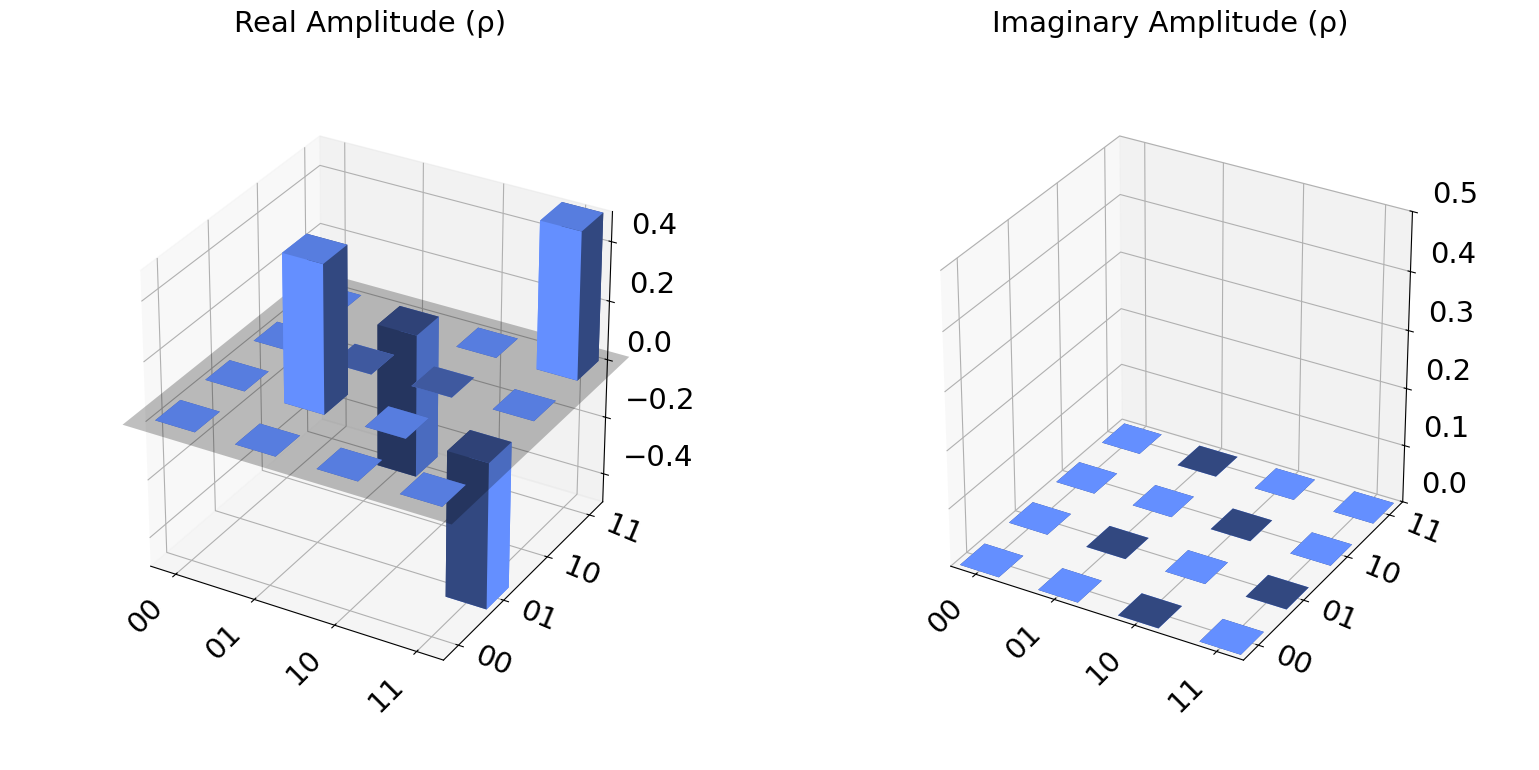

In [188]:
state_ch = DensityMatrix(qc_ch)
plot_state_city(state_ch)

$\text{Qsphere for the CH gate}$

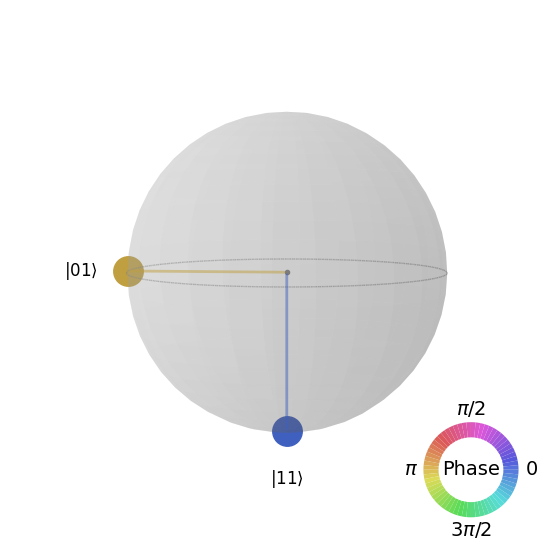

In [189]:
plot_state_qsphere(state_ch)

$\text{Unitary matrix for CH gate}$

In [191]:
#unitary
qc_ch = QuantumCircuit(2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.save_unitary()

backend = Aer.get_backend('aer_simulator')

circ = transpile(qc_ch, backend)

result = backend.run(circ).result()
ch_unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(ch_unitary).round(5))

Circuit unitary:
 [[ 0.     +0.j -0.     +0.j  0.     +0.j  1.     -0.j]
 [ 0.70711+0.j  0.     +0.j  0.70711+0.j  0.     +0.j]
 [ 0.     +0.j  1.     -0.j  0.     +0.j -0.     +0.j]
 [-0.70711+0.j  0.     +0.j  0.70711-0.j  0.     +0.j]]


In [192]:
qc_ch = QuantumCircuit(2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
circOp = Operator.from_circuit(qc_ch)
circOp.draw("latex")

<IPython.core.display.Latex object>

$\text{QASM simulator on CH gate}$

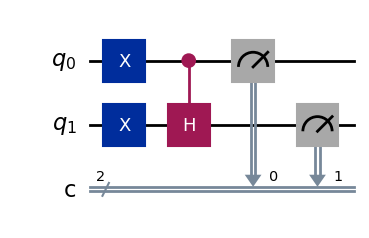

In [193]:
qc_ch = QuantumCircuit(2,2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.measure([0,1],[0,1])
qc_ch.draw(mpl)

the total counts are:  {'11': 500, '01': 500}


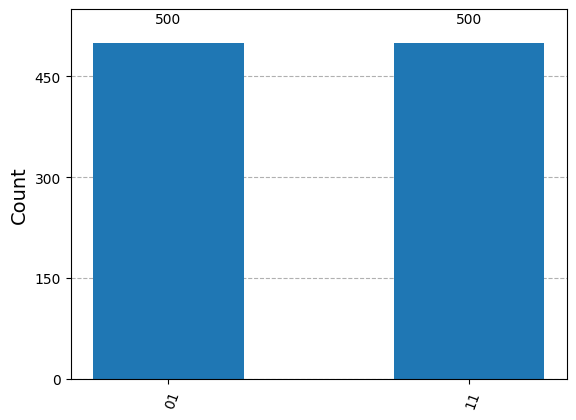

In [196]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_ch, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_ch)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CH gate using CNOT and Ry gate}$

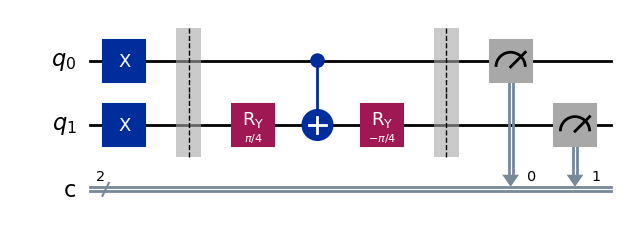

In [197]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.ry(pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.cx(0,1) # CNOT Gate
qc_ch.ry(-pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')

the total counts are:  {'01': 499, '11': 501}


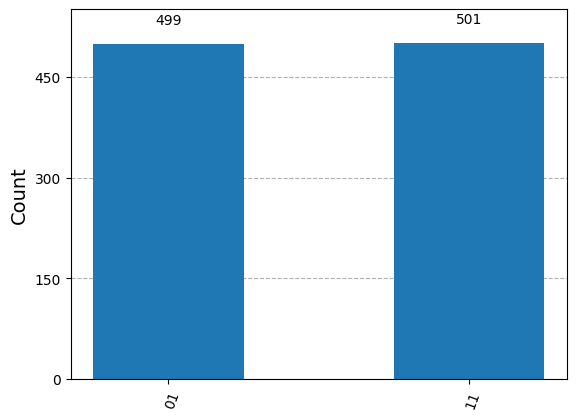

In [198]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_ch, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_ch)

print("the total counts are: ", counts)

plot_histogram(counts)